# CUSTOMER CHURN ANALYSIS PROJECT


### Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

### 1. DATA LOADING 


In [2]:
df=pd.read_csv('customer_churn_data.csv')

#### Display basic information


In [3]:
print("\nDataset Overview:")
df.head()


Dataset Overview:


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [4]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


#### 2. DATA CLEANING 


#### Handling missing values


In [5]:
print("\nNumber of Nulls in the data:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of Nulls in the data:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

Number of duplicate rows: 0


In [6]:
df['InternetService'] = df['InternetService'].fillna('Unknown')
df.isnull().sum() 

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

### 3. DATA EXPLORATION


In [7]:
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


#### Correlation matrix for numeric columns


In [8]:
numeric_colums_data= df.select_dtypes(include=['number'])
numeric_colums_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


### 4. VISUALISATIONS


#### Churn Rate Distribution


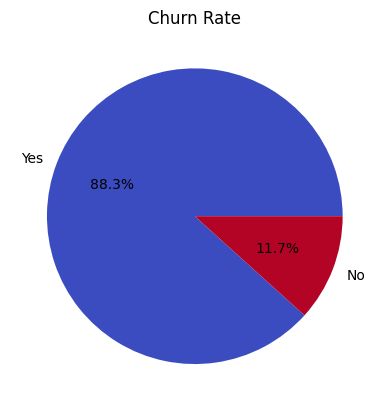

In [9]:
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',colormap='coolwarm')
plt.title('Churn Rate')
plt.ylabel('')
plt.show()

#### Internet Service Distribution


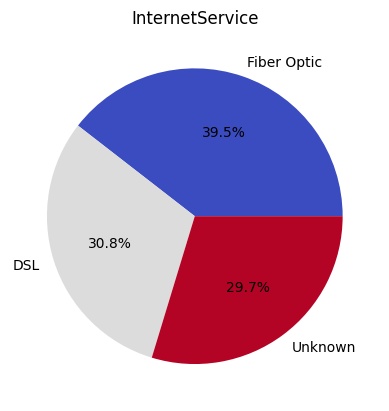

In [10]:
df['InternetService'].value_counts().plot(kind='pie',autopct='%1.1f%%',colormap='coolwarm')
plt.title('InternetService')
plt.ylabel('')
plt.show()

#### Tech Support Availability

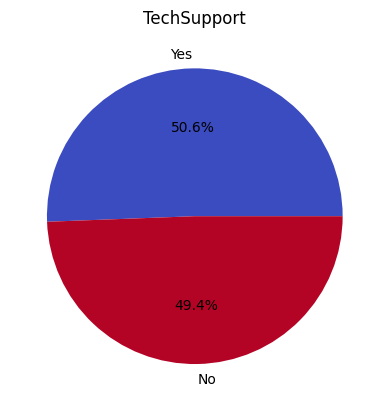

In [11]:
df['TechSupport'].value_counts().plot(kind='pie',autopct='%1.1f%%',colormap='coolwarm')
plt.title('TechSupport')
plt.ylabel('')
plt.show()

#### Churn vs Monthly Charges


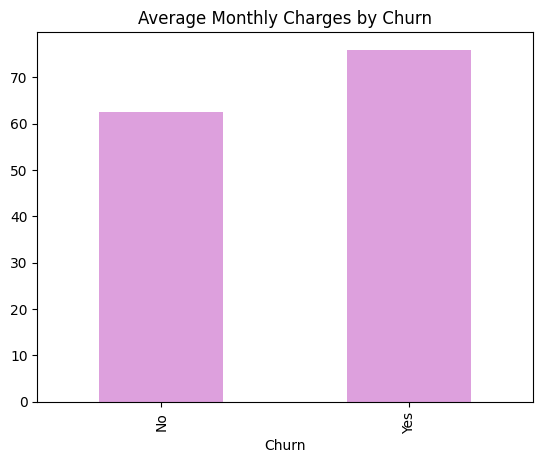

In [12]:
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar', color='plum')
plt.title('Average Monthly Charges by Churn')
plt.ylabel('')
plt.show()

#### Churn vs Tenure


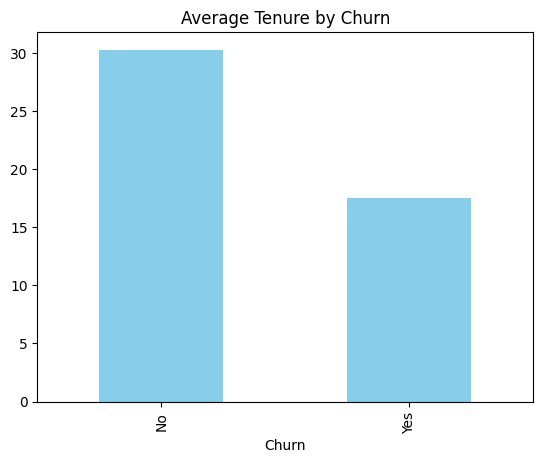

In [13]:
df.groupby('Churn')['Tenure'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Tenure by Churn')
plt.ylabel('')
plt.show()

#### Contract Type vs Monthly Charges


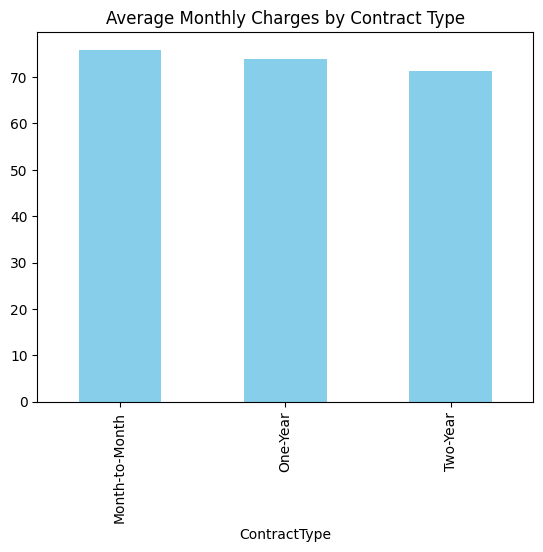

In [14]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Monthly Charges by Contract Type')
plt.ylabel('')
plt.show()

#### Contract Type vs Age


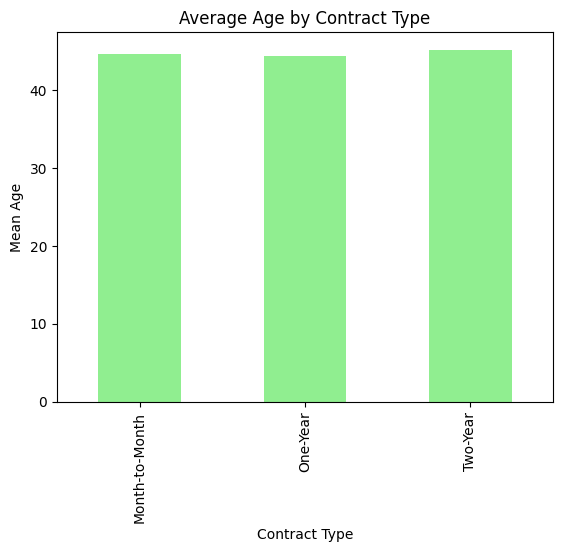

In [15]:
df.groupby('ContractType')['Age'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Age by Contract Type')
plt.ylabel('Mean Age')
plt.xlabel('Contract Type')
plt.show()

###### When examining contract types, i observe a decline in longer contracts, particularly those with lower charges. This suggests that customers prefer monthly or one-year contracts over two-year agreements. Several factors could explain this trend. One possible reason is that two-year contracts often come with higher costs due to the extended commitment. Additionally, uncertainty about future needs may discourage customers from committing long-term, making shorter contracts a more attractive and flexible option.

### 5. FEATURE ENGINEERING


#### Encoding categorical variables


In [16]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

#### Selecting features and target variable


In [17]:
x = df[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]
y = df['Churn']

###  6. DATA SPLITTING & SCALING


#### Standardizing numerical features


In [18]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

joblib.dump(scaler,'scaler.pkl') 


['scaler.pkl']

### 7. MODEL TRAINING & EVALUATION


In [19]:
def modelperformance(prediction, model_name):
    accuracy = accuracy_score(y_test, prediction) * 100 
    print('Accuracy score on {} model is {:.2f}%'.format(model_name, accuracy))

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
modelperformance(y_pred, 'Logistic Regression')

Accuracy score on Logistic Regression model is 90.00%


### 8. K-NEAREST NEIGHBORS (KNN) WITH GRID SEARCH


#### Train KNN with best parameters


In [20]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance']}

gridknn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridknn.fit(x_train, y_train)

best_knn = KNeighborsClassifier(**gridknn.best_params_)
best_knn.fit(x_train, y_train)
y_pred = gridknn.predict(x_test)

modelperformance(y_pred, 'K-Nearest Neighbors')

Accuracy score on K-Nearest Neighbors model is 90.00%


### 9. Random Forest Classification

In [21]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
modelperformance(y_pred_rf, 'Random Forest')


Accuracy score on Random Forest model is 88.00%


In [22]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_rf.fit(x_train, y_train)
print("Best parameters:", grid_rf.best_params_)
y_pred_rf_tuned = grid_rf.predict(x_test)

modelperformance(y_pred_rf_tuned, 'Tuned Random Forest')


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy score on Tuned Random Forest model is 89.50%


In [23]:
for name, score in zip(x.columns, rf_model.feature_importances_):
    print(f"{name}: {score:.2%}")

Age: 21.40%
Gender: 3.74%
Tenure: 37.15%
MonthlyCharges: 37.71%


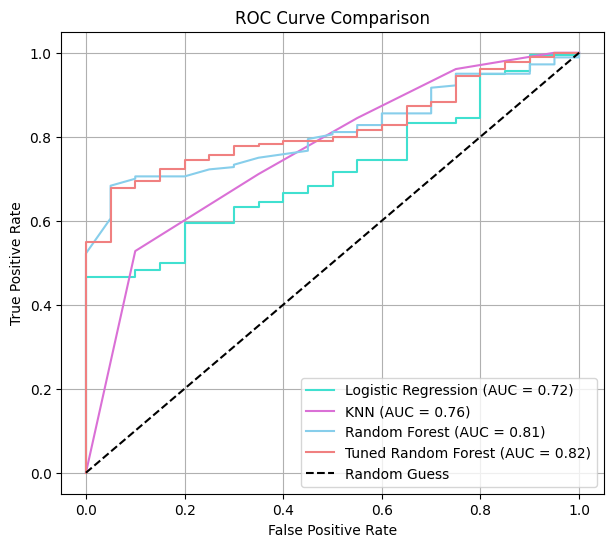

In [24]:
# Get predicted probabilities for all models
y_pred_prob_log = log_model.predict_proba(x_test)[:, 1]  # Logistic Regression
y_pred_prob_knn = best_knn.predict_proba(x_test)[:, 1]   # KNN
y_pred_prob_rf= rf_model.predict_proba(x_test)[:, 1]     # Random Forest
y_pred_prob_trf = grid_rf.predict_proba(x_test)[:, 1]     # Tuned Random Forest

# Compute ROC curves and AUC values
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_trf, tpr_trf, _ = roc_curve(y_test, y_pred_prob_trf)
roc_auc_trf = auc(fpr_trf, tpr_trf)

# Plot all ROC curves
plt.figure(figsize=(7, 6))
plt.plot(fpr_log, tpr_log, color='Turquoise', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='Orchid', label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, color='SkyBlue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_trf, tpr_trf, color='LightCoral', label=f'Tuned Random Forest (AUC = {roc_auc_trf:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()
